<a href="https://colab.research.google.com/github/EmmanuelChinkaka/PUS2022_EChinkaka0/blob/main/classdemo/PhillyCitiBikes_partiallyFilledNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Bikeshare Data from rideindego.com

while the data is open and accessible it is stored in poorly maintained. It is stored in individual files for each quarter from 2016 through 2022 - zipped csv files (but occasionally additional files are indcluded in the compressed zip) and the naming scheme for the files is not systematic, which is very annoying, and also really common.
I use the ```urllib3``` library to download the page with all the links to the data files and ```BeautifulSoup`` to read the html page and extract the links. 

Additionally I use ```os``` and ```glob``` to downlead, and to find and open the data files after I downloaded them.

Later I use ```pandas``` to read the csv files in

For the geospatial analysis I will use
- ```shapely``` to create points and lines
- ```geopandas``` to plot
- ```folium``` for working with leaflet maps

Finally I will import the colormap tools from matplotlib to map colors to variables in my maps

In [1]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# interacting with hosting site
import urllib3
from bs4 import BeautifulSoup

# getting and reading files
import os
import glob
import pandas as pd

# geospatial analysis 
from shapely.geometry import Point, LineString
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster

# I need to set colormaps to be mapped to variables

from matplotlib import cm






# getting the data


## get the links

In [3]:
http = urllib3.PoolManager()
c = http.request('GET', url="https://www.rideindego.com/about/data/")
soup = BeautifulSoup(c.data.decode('utf-8'))


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [4]:
#the webpage with the links
soup.prettify()

'<!DOCTYPE html>\n<!--[if lt IE 7]><html lang="en-US" class="no-js lt-ie9 lt-ie8 lt-ie7"><![endif]-->\n<!--[if (IE 7)&!(IEMobile)]><html lang="en-US" class="no-js lt-ie9 lt-ie8"><![endif]-->\n<!--[if (IE 8)&!(IEMobile)]><html lang="en-US" class="no-js lt-ie9"><![endif]-->\n<!--[if gt IE 8]><!-->\n<html class="no-js" lang="en-US">\n <!--<![endif]-->\n <head>\n  <meta charset="utf-8"/>\n  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>\n  <meta content="width=device-width, initial-scale=1, maximum-scale=1" name="viewport"/>\n  <link href="https://u626n26h74f16ig1p3pt0f2g-wpengine.netdna-ssl.com/wp-content/themes/indego/library/images/apple-touch-icon.png" rel="apple-touch-icon"/>\n  <link href="https://u626n26h74f16ig1p3pt0f2g-wpengine.netdna-ssl.com/wp-content/themes/indego/library/images/favicon.png" rel="icon"/>\n  <!--[if IE]>\n\t\t\t<link rel="shortcut icon" href="https://u626n26h74f16ig1p3pt0f2g-wpengine.netdna-ssl.com/wp-content/themes/indego/library/images/favicon.ico">\n\

In [5]:
#the list of links
linklist = [link.get('href') for link in soup.find_all('a') 
              if "upload" in link.get('href')]
linklist              

['https://u626n26h74f16ig1p3pt0f2g-wpengine.netdna-ssl.com/wp-content/uploads/2022/07/indego-trips-2022-q2.zip',
 'https://u626n26h74f16ig1p3pt0f2g-wpengine.netdna-ssl.com/wp-content/uploads/2022/04/indego-trips-2022-q1.zip',
 'https://u626n26h74f16ig1p3pt0f2g-wpengine.netdna-ssl.com/wp-content/uploads/2022/01/indego-trips-2021-q4.zip',
 'https://u626n26h74f16ig1p3pt0f2g-wpengine.netdna-ssl.com/wp-content/uploads/2021/10/indego-trips-2021-q3.zip',
 'https://u626n26h74f16ig1p3pt0f2g-wpengine.netdna-ssl.com/wp-content/uploads/2021/07/indego-trips-2021-q2.zip',
 'https://u626n26h74f16ig1p3pt0f2g-wpengine.netdna-ssl.com/wp-content/uploads/2021/04/indego-trips-2021-q1.zip',
 'https://u626n26h74f16ig1p3pt0f2g-wpengine.netdna-ssl.com/wp-content/uploads/2021/01/indego-trips-2020-q4.zip',
 'https://u626n26h74f16ig1p3pt0f2g-wpengine.netdna-ssl.com/wp-content/uploads/2020/10/indego-trips-2020-q3.zip',
 'https://u626n26h74f16ig1p3pt0f2g-wpengine.netdna-ssl.com/wp-content/uploads/2020/08/indego-tri

## download and read the links

In [6]:
#downloading each link
for url in linklist:
  os.system("wget " + url)

In [7]:
#the list of files locally
glob.glob("*rips*")

['Indego_Trips_2015Q3.zip',
 'Q3_2016_trips.zip.1',
 'indego-trips-2020-q4.zip.1',
 'Indego_Trips_2016Q2.zip',
 'Q3_2016_trips.zip',
 'indego-trips-2021-q3.zip.1',
 'indego-trips-2022-q2.zip',
 'Indego_Trips_2016Q1.zip',
 'indego-trips-2019-q4.csv.zip',
 'indego-trips-2020-q2.zip.1',
 'indego-trips-2021-q2.zip',
 'Indego_Trips_2015Q4.zip.1',
 'indego_gbfs_trips_Q2_2017.csv.zip',
 'indego-trips-2021-q2.csv',
 'indego-trips-2020-q1.csv',
 'indego_gbfs_trips_Q1_2017.zip',
 'indego-trips-2022-q1.zip.1',
 'indego-trips-2019-q1.csv.zip',
 'indego-trips-2018-q3.csv',
 'indego-trips-2018-q1.csv.zip',
 'indego-trips-2020-q3.zip.1',
 'Indego_Trips_2016Q1.zip.1',
 'Indego_Trips_2016Q2.zip.1',
 'indego-trips-2019-q3-1.zip.1',
 'indego-trips-2019-q4.csv.zip.1',
 'indego-trips-2017-q3.csv.zip',
 'indego_gbfs_trips_Q2_2017.csv.zip.1',
 'indego-trips-2017-q4.csv.zip',
 'indego-trips-2022-q2.zip.1',
 'indego-trips-2018-q3.csv.zip.1',
 'indego-trips-2021-q4.zip',
 'indego-trips-2020-q3.zip',
 'indego-tr

In [8]:
# read in the csv file - each file is read in into a "dictionary" - the data can then be retrieved by year and quarder:
# e.g. pds[2016][Q1] retrieves the data from 2016 January 1st through 2016 March 31st
pds = {} # prepare the container
for y in range(2015, 2023): #loop over all years
  print(y)
  pds[y] = {}
  _ = [url for url in glob.glob("*rips*") if ("%d"%y in url)]
  for q in range(1, 5):
    print("\t", q)
    try:
      pds[y][q] = pd.read_csv([url for url in _ 
                             if ("Q%d"%q in url) or ("q%d"%q in url)][0])
    except ValueError:
      os.system("unzip " + [url for url in _ 
                             if ("Q%d"%q in url) or ("q%d"%q in url)][0])
      try:
        pds[y][q] = pd.read_csv([url for url in glob.glob("*rips*csv") if (("%d"%y in url) and 
                                (("Q%d"%q in url) or ("q%d"%q in url)))][0])
      except IndexError:
        print("\t\tno data for this quarter")
    except IndexError:
      print("\t\tno data for this quarter")

2015
	 1
		no data for this quarter
	 2
	 3


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


	 4
2016
	 1
	 2
	 3
	 4
2017
	 1
	 2
	 3
	 4
2018
	 1
	 2
	 3
	 4
2019
	 1
	 2
	 3
	 4
2020
	 1
	 2
	 3
	 4
2021
	 1
	 2
	 3
	 4
2022
	 1
	 2
	 3
		no data for this quarter
	 4
		no data for this quarter


# explore the data

In [9]:
#get the info for each year and each quarter
for y in pds.keys(): #years look
  for q in pds[y].keys(): #quarter loop
    print(pds[y][q].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119559 entries, 0 to 119558
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   trip_id              119559 non-null  int64  
 1   duration             119559 non-null  int64  
 2   start_time           119559 non-null  object 
 3   end_time             119559 non-null  object 
 4   start_station_id     119559 non-null  int64  
 5   start_lat            119559 non-null  float64
 6   start_lon            119559 non-null  float64
 7   end_station_id       119559 non-null  int64  
 8   end_lat              119559 non-null  float64
 9   end_lon              119559 non-null  float64
 10  bike_id              118649 non-null  float64
 11  plan_duration        119559 non-null  int64  
 12  trip_route_category  119559 non-null  object 
 13  passholder_type      119559 non-null  object 
dtypes: float64(5), int64(5), object(4)
memory usage: 12.8+ MB
None
<clas

In [10]:
#get the number of rows and columns for each year and quarter
for y in pds.keys(): #year loop
  for q in pds[y].keys(): #quarter loop
    print(pds[y][q].shape)

(119559, 14)
(188368, 14)
(121783, 14)
(73169, 14)
(170824, 14)
(234946, 14)
(176119, 14)
(107772, 14)
(220441, 14)
(276785, 14)
(183909, 14)
(98993, 14)
(201624, 14)
(228329, 15)
(142872, 15)
(96593, 15)
(206354, 15)
(275197, 15)
(166116, 15)
(118190, 15)
(186586, 15)
(269985, 15)
(160401, 15)
(96281, 15)
(232195, 15)
(300432, 15)
(330220, 15)
(129073, 15)
(257350, 15)


In [11]:
# an example of a file # 2022-July thorugh 2022-September
pds[2021][3].head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,398698761,11,7/1/2021 0:00,7/1/2021 0:11,3045,39.947922,-75.162369,3030,39.939350,-75.157158,3360,30,One Way,Indego30,standard
1,398698759,4,7/1/2021 0:02,7/1/2021 0:06,3052,39.947319,-75.156952,3238,39.946281,-75.151382,5420,30,One Way,Indego30,standard
2,398698757,56,7/1/2021 0:03,7/1/2021 0:59,3192,39.962070,-75.141113,3161,39.954861,-75.180908,18450,30,One Way,Indego30,electric
3,398698755,55,7/1/2021 0:04,7/1/2021 0:59,3192,39.962070,-75.141113,3161,39.954861,-75.180908,16508,30,One Way,Indego30,electric
4,398698753,5,7/1/2021 0:08,7/1/2021 0:13,3052,39.947319,-75.156952,3046,39.950119,-75.144722,3475,365,One Way,Indego365,standard


In [12]:
pds[2021][3].describe()


,trip_id,duration,start_station,start_lat,start_lon,end_station,end_lat,end_lon,plan_duration
count,3.004320e+05,300432.000000,300432.000000,300412.000000,300412.000000,300432.000000,296273.000000,296273.000000,300432.000000
mean,4.134962e+08,18.858880,3103.809827,39.952136,-75.169267,3102.941684,39.951943,-75.169025,77.623655
std,8.603314e+06,48.931549,73.620408,0.012410,0.016551,74.181687,0.012462,0.016559,122.491870
min,3.986987e+08,1.000000,3000.000000,39.889938,-75.226372,3000.000000,39.889938,-75.226372,1.000000
25%,4.058970e+08,7.000000,3040.000000,39.945610,-75.179710,3039.000000,39.945610,-75.179710,30.000000
50%,4.135417e+08,11.000000,3078.000000,39.951340,-75.167831,3077.000000,39.951340,-75.167580,30.000000
75%,4.211006e+08,19.000000,3168.000000,39.959240,-75.158882,3168.000000,39.959229,-75.158211,30.000000
max,4.286479e+08,1440.000000,3256.000000,39.991791,-75.129936,3256.000000,39.991791,-75.129936,365.000000


# data preprocessing

In [13]:
#convert date column to a datetime object
pds[2021][3]["start_date"] = pd.to_datetime(pds[2021][3]["start_time"]).dt.date

In [14]:
# create a point from the latitude-longitude values of the start of the trip
pds[2021][3]["startlonlat"] = pds[2021][3][["start_lon", "start_lat"]].apply(lambda x: 
                          Point(x['start_lon'], x['start_lat']), axis=1)


/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [17]:
# create a point from the latitude-longitude values of the end of the trip
pds[2021][3]["endlonlat"] = pds[2021][3][["end_lon", "end_lat"]].apply(lambda x: 
                          Point(x['end_lon'], x['end_lat']), axis=1)


In [16]:
# create a line between the start and end positions... not so easy!
pds[2021][3][["startlonlat", "endlonlat"]].apply(lambda x:
              LineString([x["startlonlat"], x["endlonlat"]]), axis=1)

IndexError: ignored

In [ ]:
def makeline(x, y):
  try: 
    _ = LineString([x, y])
  except IndexError:
    _ =  LineString([(0,0), (0,0)])
  return _

pds[2021][3]["trip"] = pds[2021][3][["startlonlat", "endlonlat"]].apply(lambda x: 
                          makeline(x["startlonlat"], x["endlonlat"]), axis=1)

In [ ]:
#get only the 1-way trips
tripdf = pds[2021][3]
tripdf = tripdf[tripdf["trip_route_category"] == "One Way"]

In [ ]:
#remove the trips with missing coordinates
tripdf = tripdf[~tripdf["start_lat"].isna()]
tripdf = tripdf[~tripdf["end_lat"].isna()]


In [ ]:
tripdf.shape

# mapping and geospatial analysis

#simple plots with geopandas: I can plot the bike stations 
trajectories

In [18]:
#convert to geodataframe
gpds = pds[2021][3]
gpds = gpd.GeoDataFrame(gpds)
gpds["geometry"] = gpds["startlonlat"] # associate the trip trajectories to the geometry in the geodataframe

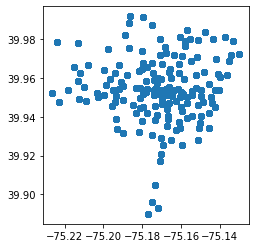

In [19]:
gpds.plot()

I can plot the trip trajectories

In [20]:
#convert to geodataframe
gpds = pds[2021][3]
gpds = gpd.GeoDataFrame(gpds)
gpds["geometry"] = gpds["trip"] # associate the trip trajectories to the geometry in the geodataframe

KeyError: ignored

## plot the zipcodes of Philly

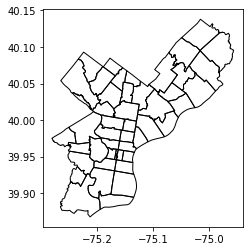

In [21]:
# get the zipcode dataframe
zips = gpd.GeoDataFrame.from_file("https://opendata.arcgis.com/api/v3/datasets/b54ec5210cee41c3a884c9086f7af1be_0/downloads/data?format=shp&spatialRefId=4326")
zips.plot(ec = "k", fc="none");

In [22]:
# what is the coordinate system for the geo data? 
zips.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [23]:
#set the same coordinate system for the bike trajectories
gpds.crs = zips.crs

Text(81.74647069067794, 0.5, 'latitude')

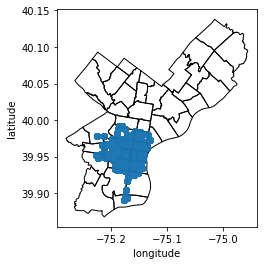

In [24]:
#plot stations over the trip trajectories
ax = zips.plot(ec = "k", fc="none")
xlim = ax.get_xlim()
ylim = ax.get_ylim()
gpds["geometry"] = gpds["startlonlat"] # associate the trip trajectories to the geometry in the geodataframe
gpds.plot(ax = ax, alpha=0.1)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel("longitude")
ax.set_ylabel("latitude")

KeyError: ignored

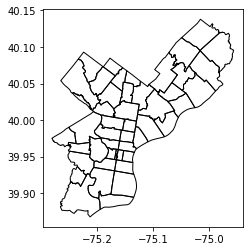

In [25]:
#plot trips over the trip trajectories (start with a subset cuase this it time consuming!)
ax = zips.plot(ec = "k", fc="none")
xlim = ax.get_xlim()
ylim = ax.get_ylim()
gpds["geometry"] = gpds["trip"] # associate the trip trajectories to the geometry in the geodataframegpds[:100].plot(ax = ax, alpha=0.5)
gpds.plot(ax = ax, alpha=0.5)
ax.set_xlim(xlim)
ax.set_ylim(ylim[0], 40.05);
ax.set_xlabel("longitude")
ax.set_ylabel("latitude")

Text(81.74647069067794, 0.5, 'latitude')

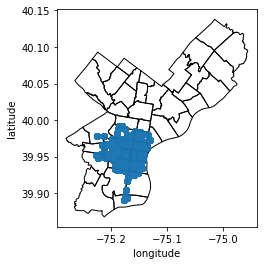

In [26]:
#plot trips over the trip trajectories
ax = zips.plot(ec = "k", fc="none")
xlim = ax.get_xlim()
ylim = ax.get_ylim()
gpds.plot(ax = ax, alpha=0.1)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel("longitude")
ax.set_ylabel("latitude")

In [27]:
#measure trip length
gpds["triplen"] = gpds.geometry.length
gpds.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


,trip_id,duration,start_station,start_lat,start_lon,end_station,end_lat,end_lon,plan_duration,triplen
count,3.004320e+05,300432.000000,300432.000000,300412.000000,300412.000000,300432.000000,296273.000000,296273.000000,300432.000000,300432.0
mean,4.134962e+08,18.858880,3103.809827,39.952136,-75.169267,3102.941684,39.951943,-75.169025,77.623655,0.0
std,8.603314e+06,48.931549,73.620408,0.012410,0.016551,74.181687,0.012462,0.016559,122.491870,0.0
min,3.986987e+08,1.000000,3000.000000,39.889938,-75.226372,3000.000000,39.889938,-75.226372,1.000000,0.0
25%,4.058970e+08,7.000000,3040.000000,39.945610,-75.179710,3039.000000,39.945610,-75.179710,30.000000,0.0
50%,4.135417e+08,11.000000,3078.000000,39.951340,-75.167831,3077.000000,39.951340,-75.167580,30.000000,0.0
75%,4.211006e+08,19.000000,3168.000000,39.959240,-75.158882,3168.000000,39.959229,-75.158211,30.000000,0.0
max,4.286479e+08,1440.000000,3256.000000,39.991791,-75.129936,3256.000000,39.991791,-75.129936,365.000000,0.0


In [28]:
#normalize trip lenght
#max of len is .090212
c = cm.viridis(gpds["triplen"] / (0.090212))

Text(81.74647069067794, 0.5, 'latitude')

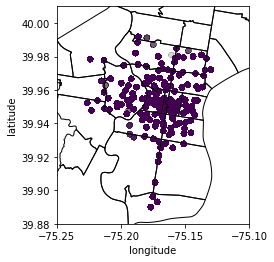

In [29]:
#map color of the trip to trip length
ax = zips.plot(ec = "k", fc="none")
xlim = ax.get_xlim()
ylim = ax.get_ylim()
gpds.plot(ax = ax, alpha=0.005, 
                color = cm.viridis(gpds["triplen"] / (0.090212)))
ax.set_xlim(-75.25, -75.1)
ax.set_ylim(39.880, 40.01);

ax.set_xlabel("longitude")
ax.set_ylabel("latitude")

In [30]:
#Define coordinates of where we want to center our map
phl = [ 39.952583,  -75.165222]

#Create the map
my_map = folium.Map(location = phl, zoom_start = 12)

#Display the map
my_map

In [31]:
stations = gpds.groupby("start_station").first()
stations

,trip_id,duration,start_time,end_time,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,start_date,startlonlat,endlonlat,geometry,triplen
start_station,,,,,,,,,,,,,,,,,,,
3000,399093263,37,7/2/2021 15:35,7/2/2021 16:12,NaN,NaN,3157,39.925449,-75.159538,19091,365,One Way,Indego365,electric,2021-07-02,POINT EMPTY,POINT (-75.159538 39.925449),POINT EMPTY,0.0
3004,398758923,15,7/1/2021 7:41,7/1/2021 7:56,39.953781,-75.163742,3038,39.947811,-75.194092,14690,30,One Way,Indego30,standard,2021-07-01,POINT (-75.163742 39.953781),POINT (-75.194092 39.947811),POINT (-75.16374 39.95378),0.0
3005,398698706,11,7/1/2021 1:17,7/1/2021 1:28,39.947330,-75.144028,3025,39.937241,-75.161201,14488,30,One Way,Indego30,standard,2021-07-01,POINT (-75.144028 39.94733),POINT (-75.161201 39.937241),POINT (-75.14403 39.94733),0.0
3006,398698703,4,7/1/2021 1:22,7/1/2021 1:26,39.952202,-75.203110,3208,39.950481,-75.193237,17055,30,One Way,Indego30,electric,2021-07-01,POINT (-75.20311 39.952202),POINT (-75.193237 39.950481),POINT (-75.20311 39.95220),0.0
3007,398698739,6,7/1/2021 0:14,7/1/2021 0:20,39.945171,-75.159927,3213,39.938869,-75.166634,19676,30,One Way,Indego30,electric,2021-07-01,POINT (-75.159927 39.945171),POINT (-75.166634 39.938869),POINT (-75.15993 39.94517),0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3252,415488212,9,8/23/2021 21:46,8/23/2021 21:54,39.938820,-75.193237,3163,39.949741,-75.180969,11855,30,One Way,Indego30,standard,2021-08-23,POINT (-75.193237 39.93882),POINT (-75.180969 39.949741),POINT (-75.19324 39.93882),0.0
3253,418005875,63,8/31/2021 21:21,8/31/2021 22:24,39.931740,-75.189957,3253,39.931740,-75.189957,19879,30,Round Trip,Indego30,electric,2021-08-31,POINT (-75.189957 39.93174),POINT (-75.189957 39.93174),POINT (-75.18996 39.93174),0.0
3254,425179466,27,9/22/2021 18:07,9/22/2021 18:34,39.980911,-75.160652,3010,39.947109,-75.166183,14567,365,One Way,Indego365,standard,2021-09-22,POINT (-75.160652 39.980911),POINT (-75.166183 39.947109),POINT (-75.16065 39.98091),0.0


In [32]:
stations.loc[3255, "startlonlat"].x

-75.164383

In [33]:
stations = stations.dropna()

In [34]:
#Create the map

my_map = folium.Map(location = phl, zoom_start = 12)



for i in stations.index:
  folium.RegularPolygonMarker((stations.loc[i, "start_lat"], 
                               stations.loc[i, "start_lon"]), 
                              popup = "%d"%i, 
                              color = '#00ff40',
                              number_of_sides = 3, 
                              radius = 3).add_to(my_map)

#Display the map
my_map


In [ ]:
ax = zips.plot(ec = "k", fc="none")
xlim = ax.get_xlim()
ylim = ax.get_ylim()
gpds[:10000].plot(ax = ax, alpha=0.05, 
                color = cm.viridis(gpds["triplen"] / (0.090212)))
ax.set_xlim(-75.25, -75.1)
ax.set_ylim(39.880, 40.01);

ax.set_xlabel("longitude")
ax.set_ylabel("latitude");

In [ ]:
ax = zips.plot(ec = "k", fc="none")
xlim = ax.get_xlim()
ylim = ax.get_ylim()
gpds[:100000].plot(ax = ax, alpha=0.005, 
                color = cm.viridis(gpds["triplen"] / (0.090212)))
ax.set_xlim(-75.25, -75.1)
ax.set_ylim(39.880, 40.01);

ax.set_xlabel("longitude")
ax.set_ylabel("latitude");

In [ ]:
import matplotlib


#Create the map
my_map = folium.Map(location = phl, zoom_start = 12)



for i in stations.index:
  folium.RegularPolygonMarker((stations.loc[i, "start_lat"], 
                               stations.loc[i, "start_lon"]), 
                              popup = "%d"%i, 
                              fill_color = "0000ff",
                              number_of_sides = 4, 
                              radius = stations.loc[i, "triplen"] / (0.090212) * 3).add_to(my_map)

#Display the map
my_map


In [ ]:


#Create the map
my_map = folium.Map(location = phl, zoom_start = 12)
folium.TileLayer('cartodbpositron').add_to(my_map)



for i in stations.index:
  folium.RegularPolygonMarker((stations.loc[i, "start_lat"], 
                               stations.loc[i, "start_lon"]), 
                              popup = "%d"%i, 
                              fill_color = "0000ff",
                              number_of_sides = 4, 
                              radius = stations.loc[i, "triplen"] / (0.090212) * 3).add_to(my_map)

#Display the map
my_map


In [ ]:
origins = gpds.groupby("start_station").count()[["trip_id"]].rename({
    "trip_id":"ntrips"}, axis=1)
origins

In [ ]:
stations = stations.merge(origins, left_index=True, right_index=True)

In [ ]:
stations["ntrips"].max()

In [ ]:
#Create the map
my_map = folium.Map(location = phl, zoom_start = 12.2)
folium.TileLayer('cartodbpositron').add_to(my_map)

for i in stations.index:
  folium.RegularPolygonMarker((stations.loc[i, "start_lat"], 
                               stations.loc[i, "start_lon"]), 
                              popup = "%d"%i, 
                              color = 
                              matplotlib.colors.rgb2hex(
                                  cm.viridis(stations.loc[i, "ntrips"] / 4750 * 3)),
                              number_of_sides = 10, 
                              radius = stations.loc[i, "triplen"] / .090212 * 3
                              #stations.loc[i, "ntrips"] / 4750 * 3
                              ).add_to(my_map)

#Display the map
print("Citibike stations by popularity (size) and trip length (color)")
my_map

In [ ]:
bikes = gpds.groupby("bike_id").count()
bikes["trip_id"].max()

In [ ]:
most_pop_bike = bikes[bikes["trip_id"] == 294].index[0]

In [ ]:
ax = zips.plot(ec = "k", fc="none")
xlim = ax.get_xlim()
ylim = ax.get_ylim()
gpds[gpds.bike_id == most_pop_bike].plot(ax = ax, alpha=0.5, 
                color = cm.viridis(gpds["triplen"] / (0.090212)))
ax.set_xlim(-75.25, -75.1)
ax.set_ylim(39.880, 40.01);

In [ ]:
gpds[gpds.bike_id == most_pop_bike]

In [ ]:
#Create the map
my_map = folium.Map(location = phl, zoom_start = 12)

folium.TileLayer('cartodbpositron').add_to(my_map)


for i in stations.index:
  folium.PolyLine(((stations.loc[i, "start_lat"], 
                               stations.loc[i, "start_lon"]), 
                   (stations.loc[i, "end_lat"], 
                               stations.loc[i, "end_lon"])), 
                              popup = "%d"%i, 
                              opacity=0.5,
                              color = matplotlib.colors.rgb2hex(
                                  cm.viridis(stations.loc[i, "triplen"] / .090212)),
                              weight=1 ,
                              radius = stations.loc[i, "ntrips"] / 4750 * 3).add_to(my_map)

#Display the map
my_map
